In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [ ]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/SIS-420/DATASET/Pubg_Stats.csv')

In [ ]:
print(data)

     Unnamed: 0      Player_Name  Matches_Played  Kills  Deaths  Assists  \
0             0    StealthMaster             250    587     143       98   
1             1       SniperLion             312    823     218      112   
2             2       NinjaGamer             186    492      84       56   
3             3    ThunderStrike             409    923     267      134   
4             4       SpeedDemon             143    368      68       42   
..          ...              ...             ...    ...     ...      ...   
216         216     CrimsonRider             294    743     187      132   
217         217  BlazingSorcerer             203    521     109       72   
218         218      FrozenFlare             206    553     117       76   
219         219    AbyssGuardian             220    597     144       98   
220         220  SpectralPhantom             225    624     149      100   

     Damage_Dealt  Headshots  Wins  Top_10s  Revives  Distance_Traveled  \
0           

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         221 non-null    int64 
 1   Player_Name        221 non-null    object
 2   Matches_Played     221 non-null    int64 
 3   Kills              221 non-null    int64 
 4   Deaths             221 non-null    int64 
 5   Assists            221 non-null    int64 
 6   Damage_Dealt       221 non-null    int64 
 7   Headshots          221 non-null    int64 
 8   Wins               221 non-null    int64 
 9   Top_10s            221 non-null    int64 
 10  Revives            221 non-null    int64 
 11  Distance_Traveled  221 non-null    int64 
 12  Weapons_Used       221 non-null    int64 
 13  Time_Survived      221 non-null    int64 
 14  Rank               221 non-null    object
dtypes: int64(13), object(2)
memory usage: 26.0+ KB


In [ ]:
columnas_eliminar = ['Unnamed: 0']
data = data.drop(columnas_eliminar, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Player_Name        221 non-null    object
 1   Matches_Played     221 non-null    int64 
 2   Kills              221 non-null    int64 
 3   Deaths             221 non-null    int64 
 4   Assists            221 non-null    int64 
 5   Damage_Dealt       221 non-null    int64 
 6   Headshots          221 non-null    int64 
 7   Wins               221 non-null    int64 
 8   Top_10s            221 non-null    int64 
 9   Revives            221 non-null    int64 
 10  Distance_Traveled  221 non-null    int64 
 11  Weapons_Used       221 non-null    int64 
 12  Time_Survived      221 non-null    int64 
 13  Rank               221 non-null    object
dtypes: int64(12), object(2)
memory usage: 24.3+ KB


In [ ]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [ ]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Player_Name        221 non-null    int64
 1   Matches_Played     221 non-null    int64
 2   Kills              221 non-null    int64
 3   Deaths             221 non-null    int64
 4   Assists            221 non-null    int64
 5   Damage_Dealt       221 non-null    int64
 6   Headshots          221 non-null    int64
 7   Wins               221 non-null    int64
 8   Top_10s            221 non-null    int64
 9   Revives            221 non-null    int64
 10  Distance_Traveled  221 non-null    int64
 11  Weapons_Used       221 non-null    int64
 12  Time_Survived      221 non-null    int64
 13  Rank               221 non-null    int64
dtypes: int64(14)
memory usage: 24.3 KB


In [ ]:
# En caso de identificar la "y" en otra posicion, no ultima
columnas_seleccionadas = list(range(0, 12)) + list(range(13, 14))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 12]
m = y.size

In [ ]:
print(X)
print('*'*25)
print(y)

     Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
0             86             250    587     143       98         15243   
1             78             312    823     218      112         18975   
2             45             186    492      84       56         11786   
3             95             409    923     267      134         21037   
4             83             143    368      68       42          9865   
..           ...             ...    ...     ...      ...           ...   
216           12             294    743     187      132         17567   
217            7             203    521     109       72         13123   
218           34             206    553     117       76         13756   
219            0             220    597     144       98         14967   
220           81             225    624     149      100         15345   

     Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  Rank  
0          234    32      145  

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Player_Name  Matches_Played  Kills  Deaths  Assists  Damage_Dealt  \
0             86             250    587     143       98         15243   
1             78             312    823     218      112         18975   
2             45             186    492      84       56         11786   
3             95             409    923     267      134         21037   
4             83             143    368      68       42          9865   
..           ...             ...    ...     ...      ...           ...   
216           12             294    743     187      132         17567   
217            7             203    521     109       72         13123   
218           34             206    553     117       76         13756   
219            0             220    597     144       98         14967   
220           81             225    624     149      100         15345   

     Headshots  Wins  Top_10s  Revives  Distance_Traveled  Weapons_Used  Rank  
0          234    32      145  

In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.          1.05491827  0.41450031 ...  1.92811876  0.866568
  -0.26235204]
 [ 1.          0.79074044  2.08591976 ...  4.7883617   3.14646713
  -1.37734818]
 [ 1.         -0.29899312 -1.31083589 ... -0.09116209 -0.65336476
   0.85264411]
 ...
 [ 1.         -0.66223765 -0.77166833 ... -0.46166437 -0.65336476
   0.85264411]
 [ 1.         -1.78499344 -0.39425103 ... -0.08179107  0.10660162
   0.85264411]
 [ 1.          0.88980713 -0.25945914 ...  0.05894774  0.10660162
   0.85264411]]


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [ ]:
fila_deseada = 2

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[   45   186   492    84    56 11786   156    28    97    48 60924    10
 21764     2]


theta calculado por el descenso por el gradiente: [25273.19189705   -69.75746103   222.04991803   115.53364067
    62.41373097   114.01791405   255.54495733   384.48644061
   264.51504737   333.05812715   360.67404886   459.7709148
   192.56029762   103.76764844]
El valor predecido es (usando el descenso por el gradiente): 22805.4294


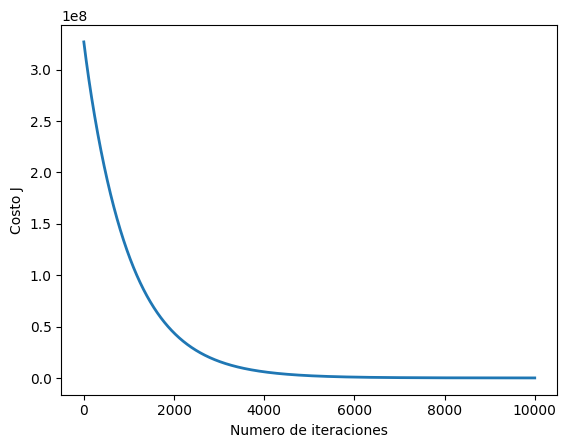

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0005
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
#X_array = [1, 78, 312, 823, 218, 112, 18975, 312, 42, 189, 95, 89042, 1, 0]
X_array = [1, 45, 186, 492, 84, 56, 11786, 156, 28, 97, 48, 60924, 10, 2]
X_array[1:14] = (X_array[1:14] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))